# Helmholtz 1D Tests & Illustrations

In [17]:
import logging
import numpy as np
import helmholtz as hm
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sys
from numpy.ma.testutils import assert_array_almost_equal
from numpy.linalg import norm

%load_ext autoreload
%autoreload 2

np.set_printoptions(linewidth=100, precision=2)
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format="%(levelname)-8s %(message)s",
                    datefmt="%a, %d %b %Y %H:%M:%S")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
n = 16
kh = 0.5
nc = 2
num_sweeps = 100
aggregate_size = 4
a = hm.linalg.helmholtz_1d_operator(kh, n)

# Generate relaxed test matrix.
level = hm.multilevel.Level(a)
x = hm.multilevel.random_test_matrix((n, ))
b = np.zeros_like(x)
x = hm.multilevel.relax_test_matrix(level.operator, lambda x: level.relax(x, b), x, num_sweeps=num_sweeps)

# Generate coarse variables (R) based on a window of x.
x_aggregate_t = x[:aggregate_size].transpose()
r, s = hm.bootstrap.create_coarse_vars(x_aggregate_t, n, nc)
print(s)

DEBUG        0 |e| 3.28729348e-02 |r| 8.74764075e-02
DEBUG       10 |e| 1.17589393e-02 |r| 2.72183781e-03 (0.95012)
DEBUG       20 |e| 1.03644986e-02 |r| 2.05141112e-03 (0.97470)
DEBUG       30 |e| 9.45332939e-03 |r| 1.61106890e-03 (0.97794)
DEBUG       40 |e| 8.80931928e-03 |r| 1.31764108e-03 (0.98171)
DEBUG       50 |e| 8.32381125e-03 |r| 1.11642966e-03 (0.98509)
DEBUG       60 |e| 7.93307388e-03 |r| 9.78396911e-04 (0.98830)
DEBUG       70 |e| 7.59992704e-03 |r| 8.83286032e-04 (0.99097)
DEBUG       80 |e| 7.30310317e-03 |r| 8.16094344e-04 (0.99296)
DEBUG       90 |e| 7.03050455e-03 |r| 7.66601056e-04 (0.99434)
DEBUG      100 |e| 6.77521713e-03 |r| 7.28196413e-04 (0.99525)
[0.46 0.2  0.01 0.  ]


In [19]:
(sum(s[2:]**2)/sum(s**2))**0.5

2.145519573055641e-16

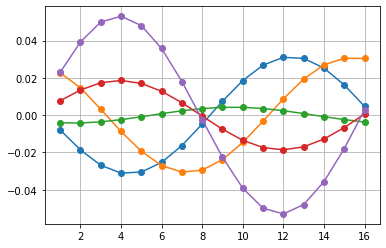

In [20]:
gridpoint = np.arange(1, n+1)
for i in range(5):
    plt.plot(gridpoint, x[:,i], '-o')
plt.grid(True);
#plt.savefig("/Users/olivne/Desktop/test_functions.png")

In [21]:
x.shape

(16, 64)

In [22]:
rr = r.toarray()[:2, :4]

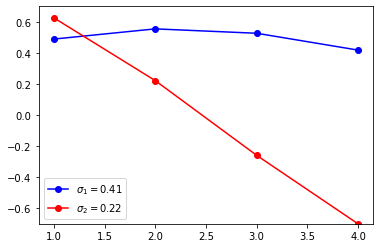

In [26]:
colors = ["b", "r"]
for i, color in enumerate(colors):
    plt.plot(np.arange(1, 5), rr[i], '{}o-'.format(color[i  % len(color)]), label="$\sigma_{" + str(i+1) + "} = " + "{:.2f}".format(s[i]) + "$")
plt.ylim([-0.7, 0.7]);
plt.legend(loc="lower left");
#plt.savefig("basis.png")

In [27]:
print("Points per period", 2*np.pi/kh)

Points per period 12.566370614359172


In [25]:
xc = r.dot(x)
xc_t = xc.transpose()

# Measure distance between x of an aggregate and xc.
d = sklearn.metrics.pairwise.cosine_similarity(x_aggregate_t.transpose(), xc_t.transpose())
print("Distances")
print(d.transpose())

Distances
[[ 0.83  0.98  0.97  0.75]
 [ 0.56  0.21 -0.25 -0.67]
 [-0.63 -0.29  0.17  0.6 ]
 [ 0.89  1.    0.93  0.66]
 [-0.83 -0.98 -0.96 -0.74]
 [-0.57 -0.22  0.24  0.66]
 [ 0.64  0.3  -0.16 -0.59]
 [-0.9  -1.   -0.92 -0.64]]
